In [1]:
from bs4 import BeautifulSoup as BS
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

import geopandas

In [2]:
request = urllib.request.Request("https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900")
result = urllib.request.urlopen(request)
resulttext = result.read()
soup = BS(resulttext, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [3]:
table = soup.find_all('table', class_="sortable wikitable")
#table
type(table)
#len(table)

bs4.element.ResultSet

In [4]:
table_2 = table[0]
type(table_2)

bs4.element.Tag

In [5]:
table_headers = table_2.find_all("th")

In [6]:
type(table_headers)

bs4.element.ResultSet

In [7]:
columns = [th.text for th in table_headers]

In [8]:
type(columns)

list

In [9]:
rows = []
for tr in table_2.find_all("tr")[1:]:
    row_data = [td.text for td in tr.find_all("td")]
    rows.append(row_data)

In [10]:
rows

[['1900-05-11 17:23',
  'Japan',
  '38.700',
  '141.100',
  '5',
  '7.0 MJMA',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['1900-07-12 06:25',
  'Turkey',
  '40.300',
  '43.100',
  '',
  '5.9 Muk',
  '',
  '',
  '',
  '140',
  '',
  ''],
 ['1900-10-29 09:11',
  'Venezuela',
  '11.000',
  '-66.000',
  '0',
  '7.7 Mw',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['1901-02-15 00:00',
  'China',
  '26.000',
  '100.100',
  '0',
  '6.5 Ms',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['1901-03-31 07:11',
  'Bulgaria',
  '43.400',
  '28.700',
  '',
  '6.4 Muk',
  '',
  '',
  '',
  '4',
  '',
  ''],
 ['1901-08-09 09:23',
  'Japan',
  '40.500',
  '142.500',
  '35',
  '7.2 Mw',
  'T',
  '',
  '',
  '',
  '',
  ''],
 ['1901-11-15 20:15',
  'New Zealand (see 1901 Cheviot earthquake)',
  '-43.000',
  '173.000',
  '0',
  '6.8 Ms',
  '',
  '',
  '',
  '1',
  '',
  ''],
 ['1902-01-30 14:01',
  'Japan',
  '40.500',
  '141.300',
  '35',
  '6.9 Ms',
  '',
  '',
  '',
  '1',
  '',
  ''],
 ['1902-02-13 09:39',
  'Azerbaija

In [11]:
earthquakes = pd.DataFrame(rows, columns = columns)

In [12]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1340 non-null object
Long                                                 1340 non-null object
Depth (km)                                           1340 non-null object
Magnitude                                            1340 non-null object
Secondary Effects                                    1340 non-null object
PDE Shaking Deaths                                   1340 non-null object
PDE Total Deaths                                     1340 non-null object
Utsu Total Deaths                                    1340 non-null object
EM-DAT Total Deaths                                  1340 non-null object
Other Source Deaths                                  1338 non-null object
dtype

In [13]:
earthquakes = earthquakes.replace("", np.nan)

In [14]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     750 non-null object
Utsu Total Deaths                                    1027 non-null object
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes: obj

In [15]:
earthquakes["Other Source Deaths"].value_counts()

1                                      3
26271[11] 26000[12]                    1
45000[9]                               1
111+                                   1
33[8]                                  1
2489[10]                               1
164[6]                                 1
380                                    1
1,115                                  1
295                                    1
2,698                                  1
105000                                 1
79                                     1
15894[20]                              1
60[16]                                 1
34                                     1
521[19]                                1
601 (as of October 30, 2011)           1
222,517[17]                            1
68                                     1
181                                    1
215                                    1
231000*[13] 283000*[14] 227898*[15]    1
150+                                   1
42              

In [16]:
earthquakes[earthquakes["Other Source Deaths"].str.contains("231000", na = False)]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1238,2004-12-26 00:58,Indonesia (see 2004 Indian Ocean earthquake),3.287,95.972,30,9.1 Mw,"T,L",NaN,297200,NaN,NaN,231000*[13] 283000*[14] 227898*[15]


In [17]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     750 non-null object
Utsu Total Deaths                                    1027 non-null object
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes: obj

In [18]:
test = "(\[\d+\]|\(.*\)|\*|\+)"

In [19]:
earthquakes["Other Source Deaths"] = earthquakes["Other Source Deaths"].str.replace(test, "")
#footnotes = earthquakes["Other Source Deaths"].str.extract("(?P<footnotes>\[\d+\]|\(.*\)|\*|\+)", expand = False)
#earthquakes["footnotes"] = footnotes.
#footnotes.unique()

In [20]:
earthquakes

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN


In [21]:
earthquakes["Other Source Deaths"].value_counts()

1                       3
60                      1
105000                  1
2489                    1
380                     1
1,115                   1
181                     1
150                     1
295                     1
222,517                 1
1500                    1
79                      1
34                      1
33                      1
45000                   1
120                     1
164                     1
2,698                   1
231000 283000 227898    1
68                      1
215                     1
111                     1
42                      1
15894                   1
2041                    1
200                     1
41                      1
189                     1
601                     1
1404                    1
26271 26000             1
3500                    1
8000                    1
46                      1
521                     1
Name: Other Source Deaths, dtype: int64

In [22]:
#This can probably be combined with previous regex to consolidate code.
earthquakes["Other Source Deaths"] = earthquakes["Other Source Deaths"].str.replace(",", "")

In [23]:
earthquakes["Other Source Deaths"].value_counts()

1                       3
60                      1
105000                  1
1500                    1
2489                    1
380                     1
181                     1
150                     1
295                     1
79                      1
215                     1
34                      1
33                      1
222517                  1
45000                   1
120                     1
164                     1
231000 283000 227898    1
2698                    1
68                      1
111                     1
42                      1
15894                   1
2041                    1
200                     1
41                      1
189                     1
601                     1
1404                    1
26271 26000             1
3500                    1
1115                    1
8000                    1
46                      1
521                     1
Name: Other Source Deaths, dtype: int64

In [24]:
means = []
for row in earthquakes["Other Source Deaths"]:
    print("\noriginal: {}".format(type(row)))
    #if isinstance(row, float):
    #    int_list = [str(row)]
    if isinstance(row, str):
        #print(len(row))
        int_list = row.strip().split(" ")
        print("transformed: {}".format(int_list))
        #row.split(" ")
        #make_int = list(map(int, int_list))
        #print("new type:", make_int)
        total = sum(list(map(int, int_list)))
        number = len(int_list)
        mean = total/number
        means.append(mean)
        print(mean)
    else:
        means.append(row)
        
earthquakes["Other Source Deaths"] = means
    
    #int_list = row.str.split(" ")
    #print(int_list)


original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'str'>
transformed: ['3500']
3500.0

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>




original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'NoneType'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'NoneType'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'flo

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

o

In [25]:
means

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 3500.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 8000.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 46.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 164.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1500.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 105000.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1404

In [26]:
earthquakes["Other Source Deaths"].value_counts()

1.000000         3
1500.000000      1
41.000000        1
105000.000000    1
2489.000000      1
521.000000       1
42.000000        1
34.000000        1
60.000000        1
68.000000        1
189.000000       1
33.000000        1
200.000000       1
120.000000       1
164.000000       1
46.000000        1
2041.000000      1
247299.333333    1
1404.000000      1
45000.000000     1
215.000000       1
1115.000000      1
15894.000000     1
295.000000       1
601.000000       1
222517.000000    1
111.000000       1
26135.500000     1
150.000000       1
79.000000        1
181.000000       1
380.000000       1
3500.000000      1
2698.000000      1
8000.000000      1
Name: Other Source Deaths, dtype: int64

In [27]:
"""There are some bad characters in this column, so this regex just grabs the int"""
for col in ['EM-DAT Total Deaths', 'Magnitude']:
    earthquakes[col] = earthquakes[col].str.extract('(\d+\.\d+)', expand=True)

In [28]:
def nan_to_int(df, columns, value=0, inplace=True):
    """Transforms the column in the dataframe to a float32 column, rather than the object type. 
    Also fills all NaN values to -1.
    """
    for col in columns:        
        df[col].fillna(value=value, inplace=inplace)
        df[col] = pd.to_numeric(df[col], downcast='float')

In [29]:
columns_to_convert = ['PDE Total Deaths', 'PDE Shaking Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Magnitude']
nan_to_int(df=earthquakes, columns=columns_to_convert)

In [30]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1340 non-null float32
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   1340 non-null float32
PDE Total Deaths                                     1340 non-null float32
Utsu Total Deaths                                    1340 non-null float32
EM-DAT Total Deaths                                  1340 non-null float32
Other Source Deaths                                  37 non-null float64
dt

In [31]:
subdf = earthquakes[["PDE Total Deaths", "Utsu Total Deaths", "EM-DAT Total Deaths", "Other Source Deaths"]]
subdf.head(1)

,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,0.0,0.0,0.0,NaN


In [32]:
earthquakes["deaths"] = subdf.max(axis = 1)

In [33]:
earthquakes.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,0.0,0.0,140.0,0.0,NaN,140.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,0.0,0.0,0.0,0.0,NaN,0.0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,0.0,0.0,0.0,0.0,NaN,0.0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,0.0,0.0,4.0,0.0,NaN,4.0


In [34]:
earthquakes.columns = ["UTC", "Country", "Lat", "Long", "Depth_km", "Mag", "Secondary_Effects", "PDE_Shaking_Deaths", "PDE_Deaths", "Utsu_Deaths", "EM-DAT_Deahts", "Other_Deaths", "Max_Deaths"]

In [35]:
test2="(\s\(.*)"
earthquakes['Country']= earthquakes['Country'].str.replace(test2, "")


In [36]:
earthquakes[earthquakes["Country"].str.contains("Alaska", case = False)]

,UTC,Country,Lat,Long,Depth_km,Mag,Secondary_Effects,PDE_Shaking_Deaths,PDE_Deaths,Utsu_Deaths,EM-DAT_Deahts,Other_Deaths,Max_Deaths
378,1958-07-10 06:15,US Territory of Alaska,58.370,-136.665,35,7.3,T,0.0,0.0,5.0,0.0,NaN,5.0


In [37]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
UTC                   1340 non-null object
Country               1340 non-null object
Lat                   1326 non-null object
Long                  1326 non-null object
Depth_km              1250 non-null object
Mag                   1340 non-null float32
Secondary_Effects     373 non-null object
PDE_Shaking_Deaths    1340 non-null float32
PDE_Deaths            1340 non-null float32
Utsu_Deaths           1340 non-null float32
EM-DAT_Deahts         1340 non-null float32
Other_Deaths          37 non-null float64
Max_Deaths            1340 non-null float64
dtypes: float32(5), float64(2), object(6)
memory usage: 110.0+ KB


In [38]:
earthquakes["UTC"] = pd.to_datetime(earthquakes["UTC"])

In [39]:
earthquakes["UTC"]

0      1900-05-11 17:23:00
1      1900-07-12 06:25:00
2      1900-10-29 09:11:00
3      1901-02-15 00:00:00
4      1901-03-31 07:11:00
5      1901-08-09 09:23:00
6      1901-11-15 20:15:00
7      1902-01-30 14:01:00
8      1902-02-13 09:39:00
9      1902-03-09 07:46:00
10     1902-04-19 02:23:00
11     1902-07-03 15:36:00
12     1902-08-22 03:00:00
13     1902-09-19 00:00:00
14     1902-12-16 05:07:00
15     1903-03-29 22:30:00
16     1903-04-28 00:00:00
17     1903-05-28 03:58:00
18     1903-08-11 04:32:00
19     1903-09-25 01:20:00
20     1904-04-24 06:39:00
21     1904-08-11 05:56:00
22     1904-08-30 11:42:00
23     1904-11-05 20:25:00
24     1905-04-04 00:50:00
25     1905-06-01 04:42:00
26     1905-06-02 05:39:00
27     1905-09-08 01:43:00
28     1905-11-08 22:06:00
29     1906-01-31 15:36:00
               ...        
1310   2008-05-25 08:21:00
1311   2008-06-06 20:02:00
1312   2008-06-08 12:25:00
1313   2008-06-13 23:43:00
1314   2008-06-17 05:51:00
1315   2008-07-15 03:26:00
1

In [40]:
earthquakes["year"] = pd.DatetimeIndex(earthquakes['UTC']).year

In [41]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 14 columns):
UTC                   1340 non-null datetime64[ns]
Country               1340 non-null object
Lat                   1326 non-null object
Long                  1326 non-null object
Depth_km              1250 non-null object
Mag                   1340 non-null float32
Secondary_Effects     373 non-null object
PDE_Shaking_Deaths    1340 non-null float32
PDE_Deaths            1340 non-null float32
Utsu_Deaths           1340 non-null float32
EM-DAT_Deahts         1340 non-null float32
Other_Deaths          37 non-null float64
Max_Deaths            1340 non-null float64
year                  1340 non-null int64
dtypes: datetime64[ns](1), float32(5), float64(2), int64(1), object(5)
memory usage: 120.5+ KB


earthquakes['date'] = pd.DatetimeIndex(earthquakes.UTC).normalize()

earthquakes["date"]

In [42]:
quakes_country = earthquakes.groupby("Country").agg(len)
quakes_country

,UTC,Lat,Long,Depth_km,Mag,Secondary_Effects,PDE_Shaking_Deaths,PDE_Deaths,Utsu_Deaths,EM-DAT_Deahts,Other_Deaths,Max_Deaths,year
Country,,,,,,,,,,,,,
(see 1997 Cariaco earthquake),1,1,1,1,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1
Afghanistan,30,30,30,30,30.0,30,30.0,30.0,30.0,30.0,30.0,30.0,30
Albania,7,7,7,7,7.0,7,7.0,7.0,7.0,7.0,7.0,7.0,7
Algeria,21,21,21,21,21.0,21,21.0,21.0,21.0,21.0,21.0,21.0,21
Argentina,11,11,11,11,11.0,11,11.0,11.0,11.0,11.0,11.0,11.0,11
Armenia,2,2,2,2,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2
Australia,3,3,3,3,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3
Azerbaijan,5,5,5,5,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0,5
Bangladesh,7,7,7,7,7.0,7,7.0,7.0,7.0,7.0,7.0,7.0,7


[Text(0,0,'China'),
 Text(0,0,'Indonesia'),
 Text(0,0,'Turkey'),
 Text(0,0,'Iran'),
 Text(0,0,'Japan'),
 Text(0,0,'Peru'),
 Text(0,0,'Taiwan'),
 Text(0,0,'Mexico'),
 Text(0,0,'Chile'),
 Text(0,0,'Greece'),
 Text(0,0,'Philippines'),
 Text(0,0,'Italy'),
 Text(0,0,'United States'),
 Text(0,0,'Afghanistan'),
 Text(0,0,'Pakistan'),
 Text(0,0,'India'),
 Text(0,0,'Colombia'),
 Text(0,0,'Algeria'),
 Text(0,0,'Ecuador'),
 Text(0,0,'Papua New Guinea'),
 Text(0,0,'Guatemala'),
 Text(0,0,'South Africa'),
 Text(0,0,'Russian Federation'),
 Text(0,0,'Argentina'),
 Text(0,0,'Burma')]

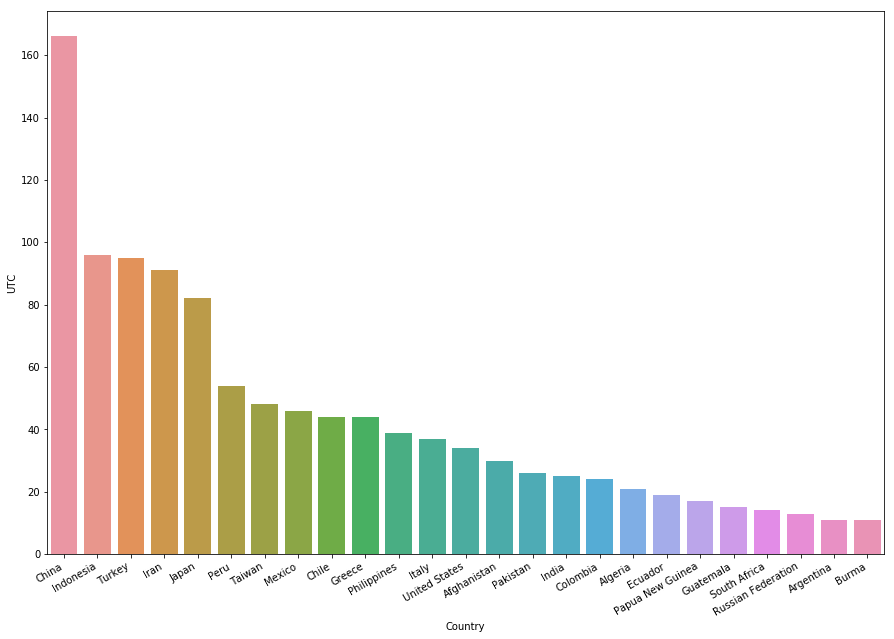

In [43]:
quakes_country = quakes_country.reset_index()
#quakes_country
quakes_country_25 = quakes_country.nlargest(25, columns = "UTC")
#quakes_country_25

f, ax = plt.subplots(figsize=(15, 10))
#plt.ylabel('Number of Quakes')
quake_count = sns.barplot(quakes_country_25.Country, quakes_country_25.UTC)
quake_count.set_xticklabels(quake_count.get_xticklabels(), rotation=30, ha="right")

In [44]:
country_list = quakes_country_25["Country"].tolist()
#country_list
earthquakes_25 = earthquakes[earthquakes["Country"].str.contains('|'.join(country_list))]
earthquakes_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105 entries, 0 to 1339
Data columns (total 14 columns):
UTC                   1105 non-null datetime64[ns]
Country               1105 non-null object
Lat                   1094 non-null object
Long                  1094 non-null object
Depth_km              1033 non-null object
Mag                   1105 non-null float32
Secondary_Effects     312 non-null object
PDE_Shaking_Deaths    1105 non-null float32
PDE_Deaths            1105 non-null float32
Utsu_Deaths           1105 non-null float32
EM-DAT_Deahts         1105 non-null float32
Other_Deaths          30 non-null float64
Max_Deaths            1105 non-null float64
year                  1105 non-null int64
dtypes: datetime64[ns](1), float32(5), float64(2), int64(1), object(5)
memory usage: 107.9+ KB


earthquakes_25['UTC'] = earthquakes_25['UTC'].astype('datetime64[ns]')
earthquakes_25.info()

plt.hist(earthquakes["UTC"])

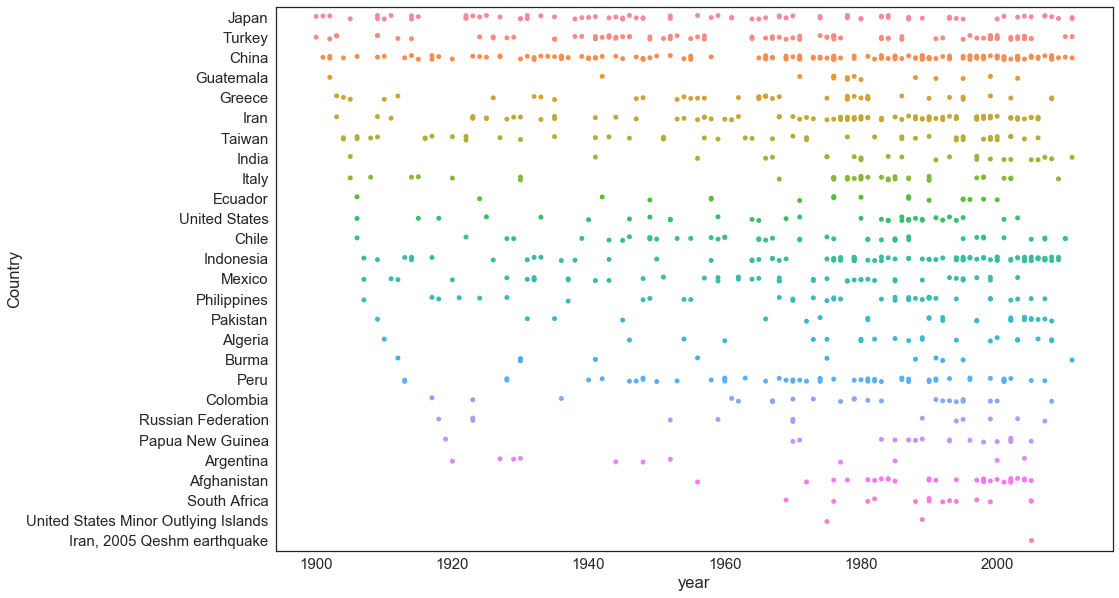

In [45]:
sns.set(font_scale = 1.5)
sns.set_style("white")
plt.subplots(figsize=(15,10))
sns.stripplot(x = "year", y = "Country", data = earthquakes_25, jitter=True)

sns.stripplot(x="Country", y="UTC", data=earthquakes_25)

In [46]:
type(earthquakes_25["UTC"])

pandas.core.series.Series

(array([  1.08100000e+03,   8.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

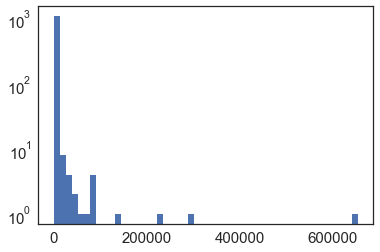

In [47]:
plt.yscale('log', nonposy='clip')
plt.hist(earthquakes_25["Max_Deaths"], bins = 50)

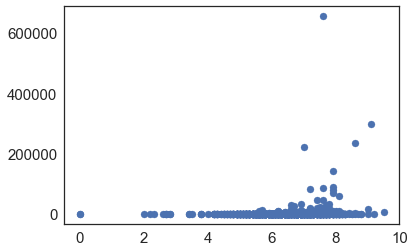

In [48]:
plt.scatter(x = earthquakes["Mag"], y = earthquakes["Max_Deaths"])

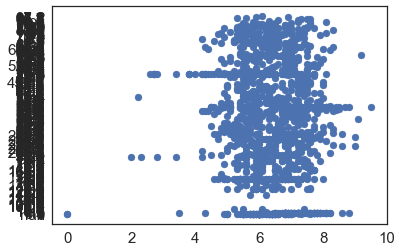

In [49]:
plt.scatter(x = earthquakes["Mag"], y = earthquakes["Depth_km"])

(array([ 181.,    0.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.,    0.,    0.,   15.,    2.,    7.,   20.,    5.,   66.,
           4.,    5.,    4.,    6.,   16.,    8.,   10.,    7.,    6.,
          14.,   13.,   22.,    6.,   12.,    5.,    5.,   15.,    6.,
          11.,    5.,   33.,    8.,   37.,   10.,   15.,    8.,   11.,
          10.,    7.,    5.,   15.,    9.,    9.,   19.,    4.,   15.,
         121.,    7.,   26.,   10.,    6.,   12.,   10.,   11.,    9.,
          10.,   10.,    7.,   10.,    4.,    5.,    7.,   82.,    7.,
          14.,    6.,    8.,    9.,    7.,    4.,   10.,   16.,   11.,
          12.,    7.,    4.,    8.,    7.,   21.,   13.,   17.,    6.,
          11.,   20.,    6.,   21.,   16.,   11.,   11.,    4.,    4.,    5.]),
 array([  -1.  ,    3.33,    7.66,   11.99,   16.32,   20.65,   24.98,
          29.31,   33.64,   37.97,   42.3 ,   46.63,   50.96,   55.29,
          59.62,   63.95,   68.28,   72.61,   76.94,   81.27,   85.6

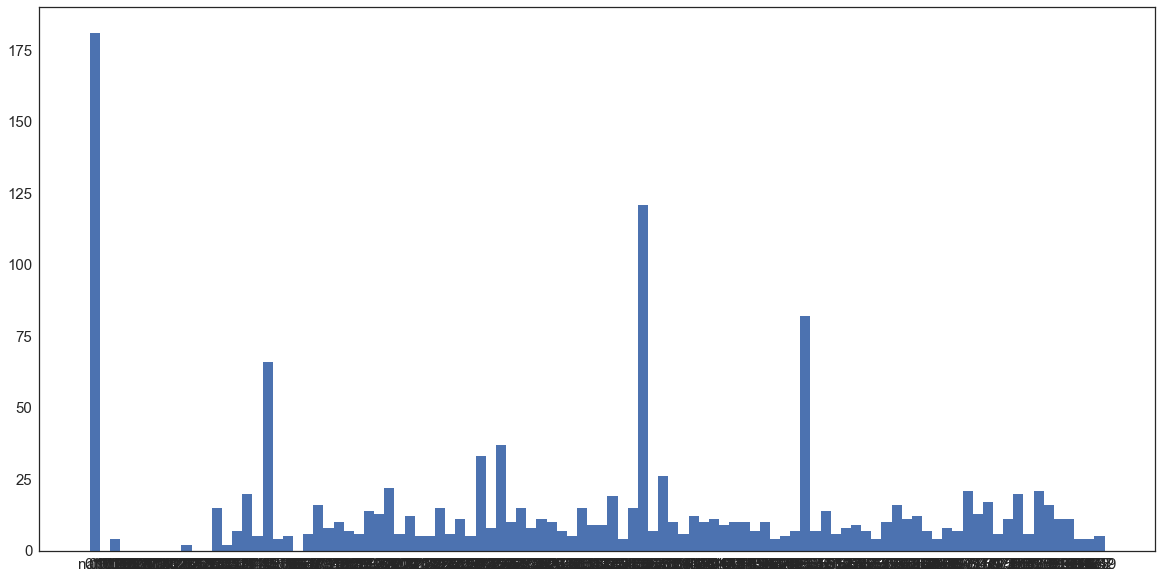

In [50]:
plt.figure(figsize=(20,10))
plt.hist(earthquakes["Depth_km"], bins = 100)

In [51]:
earthquakes["Depth_km"].value_counts()

35       112
0         90
15        62
10        47
25        32
5         31
11        19
20        18
7         15
12        14
14        14
33        13
13        13
16        12
34        10
17        10
8         10
30         9
24         9
9          8
21         8
19         8
50         7
60         7
22         7
10.7       6
6          6
1          6
10.9       5
40         5
        ... 
30.6       1
46.3       1
10.4       1
111.6      1
23.1       1
90.8       1
40.4       1
44         1
65.4       1
35.8       1
31.1       1
126.3      1
129.2      1
19.2       1
47         1
3.6        1
2.4        1
39         1
9.9        1
49.1       1
36.4       1
58         1
156        1
21.7       1
54.2       1
17.4       1
43.8       1
64         1
8.7        1
20.5       1
Name: Depth_km, Length: 433, dtype: int64

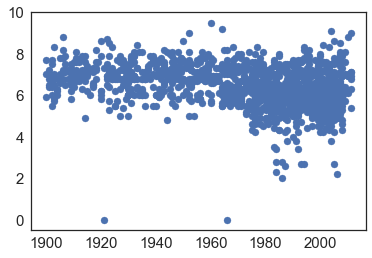

In [52]:
plt.scatter(x = earthquakes["year"], y = earthquakes["Mag"])

In [53]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 14 columns):
UTC                   1340 non-null datetime64[ns]
Country               1340 non-null object
Lat                   1326 non-null object
Long                  1326 non-null object
Depth_km              1250 non-null object
Mag                   1340 non-null float32
Secondary_Effects     373 non-null object
PDE_Shaking_Deaths    1340 non-null float32
PDE_Deaths            1340 non-null float32
Utsu_Deaths           1340 non-null float32
EM-DAT_Deahts         1340 non-null float32
Other_Deaths          37 non-null float64
Max_Deaths            1340 non-null float64
year                  1340 non-null int64
dtypes: datetime64[ns](1), float32(5), float64(2), int64(1), object(5)
memory usage: 120.5+ KB


In [54]:
earthquakes_cont = earthquakes[["Depth_km", "Mag", "Max_Deaths", "year"]]

In [55]:
earthquakes_cont.iloc[413]

Depth_km         ?
Mag            6.1
Max_Deaths    1100
year          1963
Name: 413, dtype: object

In [56]:
earthquakes_cont = earthquakes_cont.replace("?", np.nan)

In [57]:
earthquakes_cont["Depth_km"] = pd.to_numeric(earthquakes_cont["Depth_km"])

In [58]:
earthquakes_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 4 columns):
Depth_km      1249 non-null float64
Mag           1340 non-null float64
Max_Deaths    1340 non-null float64
year          1340 non-null int64
dtypes: float64(3), int64(1)
memory usage: 42.0 KB


In [59]:
earthquakes_cont = earthquakes_cont.fillna(0)

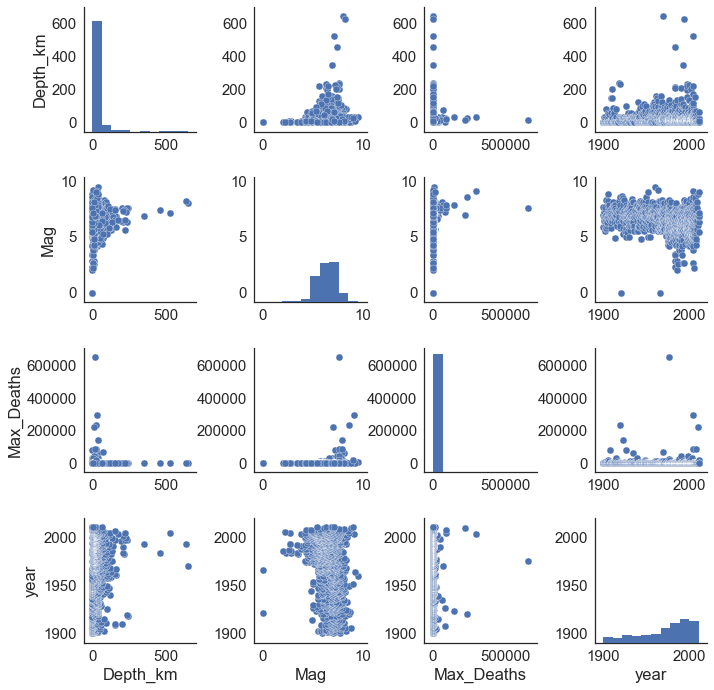

In [60]:
sns.pairplot(earthquakes_cont, dropna = True)

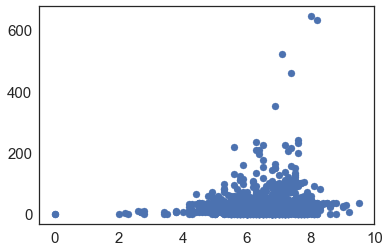

In [61]:
plt.scatter(x = earthquakes_cont["Mag"], y = earthquakes_cont["Depth_km"])